Breed: The breed of the dog (e.g., Labrador Retriever, Beagle)
Age (Years): The age of the dog, ranging from 1 to 15 years
Weight (kg): The weight of the dog in kilograms, ranging from 5 kg to 60 kg
Color: The color of the dog (e.g., Black, White, Brown)
Gender: The gender of the dog (Male or Female)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("C:\\Users\\thris\\Downloads\\dogs_dataset.csv")
df.head()

,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male


In [3]:
df.shape

(3000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        3000 non-null   object
 1   Age (Years)  3000 non-null   int64 
 2   Weight (kg)  3000 non-null   int64 
 3   Color        3000 non-null   object
 4   Gender       3000 non-null   object
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [5]:
df.describe()

,Age (Years),Weight (kg)
count,3000.000000,3000.000000
mean,7.499000,32.059667
std,4.011238,15.628463
min,1.000000,5.000000
25%,4.000000,19.000000
50%,8.000000,33.000000
75%,11.000000,45.000000
max,14.000000,59.000000


In [6]:
df["Breed"].nunique()

53

Text(0.5, 1.0, 'Distribution of Age of Dogs')

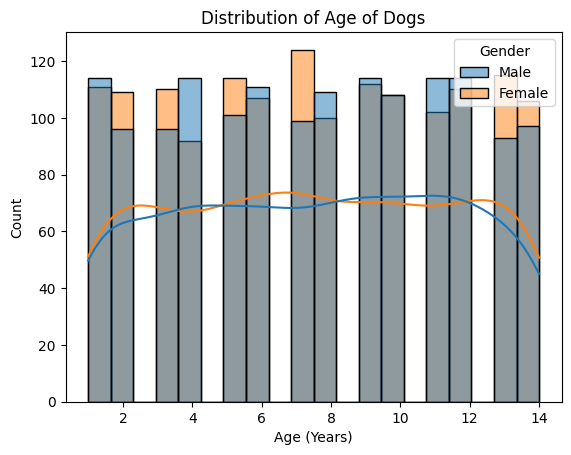

In [7]:
sns.histplot(x="Age (Years)",data=df,bins=20,hue="Gender",kde=True)
plt.title("Distribution of Age of Dogs")

Text(0.5, 1.0, 'Distribution of Weight of Dogs')

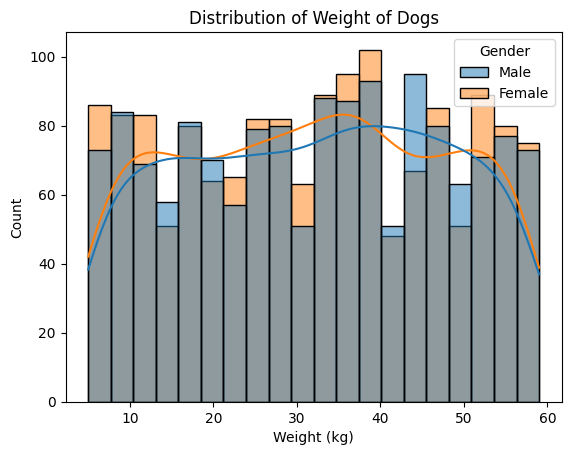

In [8]:
sns.histplot(x="Weight (kg)",data=df,bins=20,hue="Gender",kde=True)
plt.title("Distribution of Weight of Dogs")

In [9]:
fig=px.pie(names=df["Gender"].value_counts().index,values=df["Gender"].value_counts(),title="Distribution of Dog Genders pepople have")
fig.show()

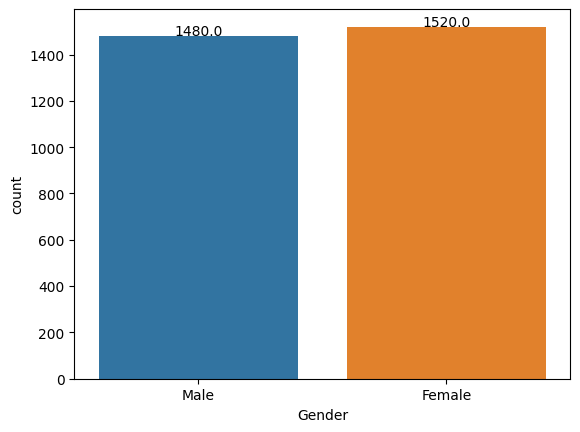

In [10]:
sns.countplot(x='Gender', data=df)

for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
             height + 3,
             height,
             ha="center")

plt.show()

In [11]:
d1=df["Color"].value_counts().reset_index(name="count")
fig=px.bar(d1,x="Color",y="count",color="Color",title="Different Colors of Dogs people Have")
fig.update_traces(textposition='auto', texttemplate='%{y}')
fig.show()

In [12]:
d1=df["Breed"].value_counts().reset_index(name="count")
fig=px.bar(d1,x="Breed",y="count",title="Different Breeds of Dogs people Have")
fig.update_traces(textposition='auto', texttemplate='%{y}')
fig.show()

In [13]:
d2=df.groupby(["Breed"])["Weight (kg)"].mean().sort_values(ascending=False)
d2

Breed
Chinese Shar-Pei                 38.234375
Golden Retriever                 35.454545
Miniature Schnauzer              35.290909
Alaskan Malamute                 34.636364
Bulldog                          34.600000
Pembroke Welsh Corgi             34.477612
Saint Bernard                    34.296296
Bull Terrier                     34.163636
Dachshund                        33.881356
Dogo Argentino                   33.672727
Pug                              33.600000
Poodle                           33.540984
Australian Shepherd              33.352941
Pekingese                        33.308824
Bernese Mountain Dog             33.267857
Irish Setter                     33.072727
Shih Tzu                         33.057692
Boston Terrier                   33.037736
Samoyed                          33.017857
Whippet                          32.666667
Schnauzer                        32.600000
Great Dane                       32.574074
Beagle                           32.509091
Blood

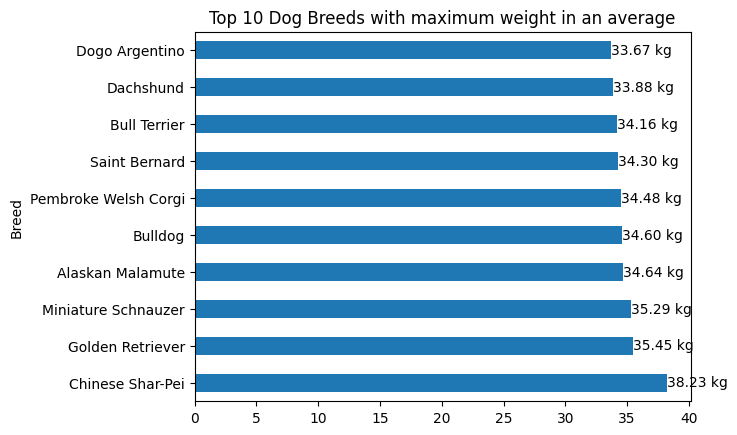

In [14]:
d2.head(10).plot(kind="barh")
plt.title("Top 10 Dog Breeds with maximum weight in an average")
for i, (breed, weight) in enumerate(d2.head(10).items()):
    plt.text(weight, i, f"{weight:.2f} kg", ha="left", va="center")

In [15]:
df.groupby(["Breed"])["Weight (kg)"].mean().sort_values(ascending=True)

Breed
Siberian Husky                   28.188679
Chesapeake Bay Retriever         28.192308
French Bulldog                   28.957143
Belgian Malinois                 29.113636
Yorkshire Terrier                29.471698
West Highland White Terrier      29.520833
Jack Russell Terrier             29.545455
Weimaraner                       29.863636
Lhasa Apso                       29.946429
Vizsla                           29.968750
Doberman Pinscher                30.075758
Shetland Sheepdog                30.200000
Cavalier King Charles Spaniel    30.234375
Chihuahua                        30.250000
Border Collie                    30.526316
Rottweiler                       30.728814
Maltese                          31.346154
Shiba Inu                        31.511111
Havanese                         31.563636
Akita                            31.686275
Airedale Terrier                 31.818182
German Shepherd                  31.867925
Labrador Retriever               31.923077
Basen

In [16]:
d3=df.groupby(["Breed"])["Weight (kg)"].mean().sort_values(ascending=True).head(10).reset_index(name="weight")
d3

,Breed,weight
0,Siberian Husky,28.188679
1,Chesapeake Bay Retriever,28.192308
2,French Bulldog,28.957143
3,Belgian Malinois,29.113636
4,Yorkshire Terrier,29.471698
5,West Highland White Terrier,29.520833
6,Jack Russell Terrier,29.545455
7,Weimaraner,29.863636
8,Lhasa Apso,29.946429
9,Vizsla,29.968750


In [17]:
fig=px.bar(d3,y="Breed",x="weight",color="Breed",orientation='h',title="Top 10 Breeds with minium weight on average")
fig.update_traces(texttemplate="%{x}",textposition="inside")
fig.show()

CLUSTERING

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
x=df.drop("Breed",axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Gender"]=le.fit_transform(x["Gender"])
x["Color"]=le.fit_transform(x["Color"])

In [21]:
cols=x.columns

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [23]:
x=pd.DataFrame(x,columns=cols)
x.head(1)

,Age (Years),Weight (kg),Color,Gender
0,1.371626,0.188171,1.660664,1.013423


In [24]:
Kmeans=KMeans(n_clusters=2,random_state=0)
y=Kmeans.fit_predict(x)

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
Kmeans.inertia_

8989.438703526448

In [26]:
silhouette_score(x,y)

0.26436044983379997

In [27]:
x.corr()

,Age (Years),Weight (kg),Color,Gender
Age (Years),1.000000,-0.003108,-0.002312,-0.002913
Weight (kg),-0.003108,1.000000,-0.010357,0.010142
Color,-0.002312,-0.010357,1.000000,-0.058387
Gender,-0.002913,0.010142,-0.058387,1.000000


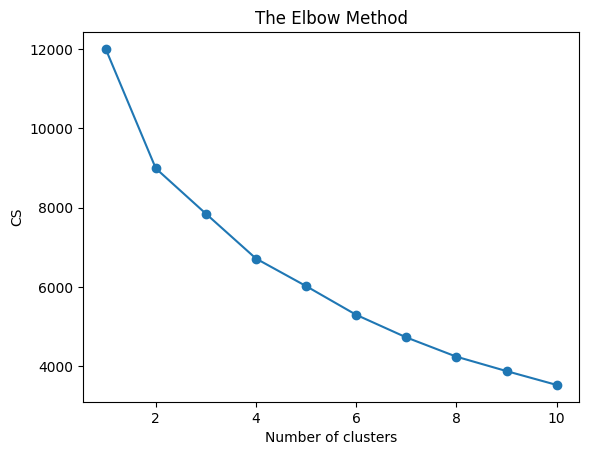

In [28]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\thris\AppData\Local\Packages\PythonSo

Text(0, 0.5, 'Silhouette Score')

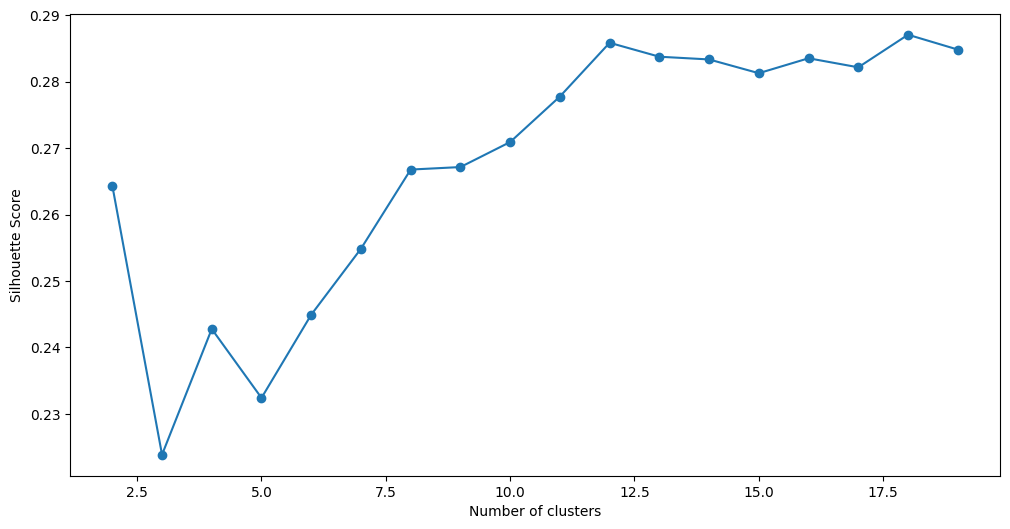

In [32]:
SSE = []
for cluster in range(2, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(x)
    labels = kmeans.labels_
    SSE.append(silhouette_score(x, labels))

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(2, 20), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

In [41]:
Kmeans=KMeans(n_clusters=18,random_state=0)
y=Kmeans.fit_predict(x)

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [42]:
silhouette_score(x,y)

0.2836075758155533

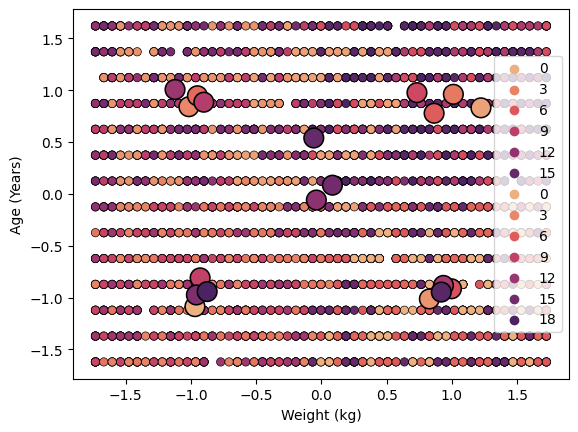

In [45]:
sns.scatterplot(x =x.iloc[ : ,1] ,y =x.iloc[ : ,0] ,
                data =x ,hue =y ,palette='flare' ,edgecolor ='k')

centers_df = pd.DataFrame(kmeans.cluster_centers_[: , :2], columns=['x', 'y'])
sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="X")

plt.show()

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

X=pca.fit_transform(x)

In [47]:
xd=pd.DataFrame(X,columns=["PCA1","PCA2"])
xd.head(2)

,PCA1,PCA2
0,0.426785,0.950661
1,1.373485,0.007357


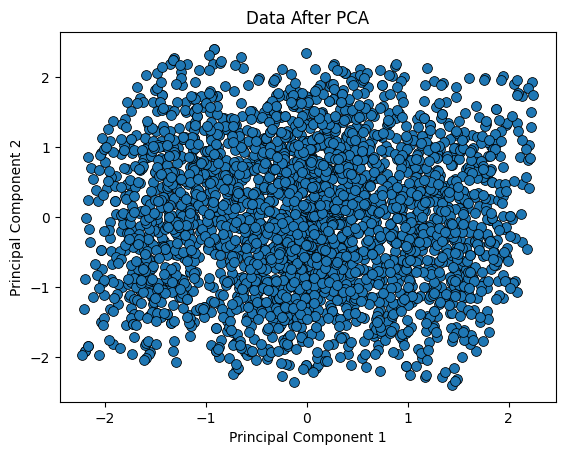

In [48]:
sns.scatterplot(x='PCA1'
                , y='PCA2'
                , data=xd
                , marker='o'
                , s=50
                , edgecolor='k')

plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [66]:
kmeans=KMeans(n_clusters=7)
xx=kmeans.fit_predict(xd)

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [67]:
silhouette_score(xd, xx)

0.3608390061695126

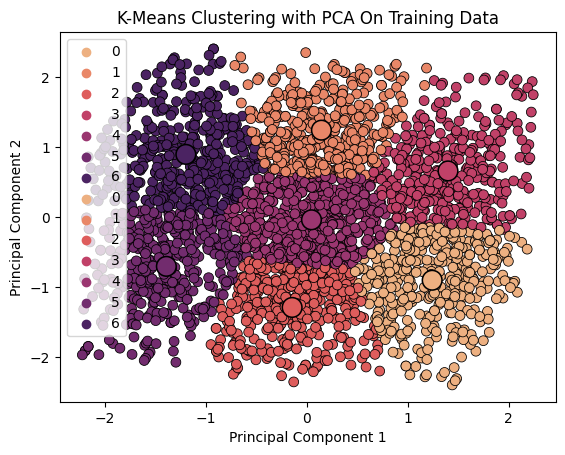

In [68]:
centers_df = pd.DataFrame(kmeans.cluster_centers_[: , :2], columns=['x', 'y'])

sns.scatterplot(x='PCA1'
                , y='PCA2' 
                ,data=xd
                , hue=xx
                , marker='o'
                , s=50
                ,palette='flare'
                ,edgecolor='k')

sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="*")

plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()